# Exp.5 Calculate theoretical model accuracy on ideal leakage model by blute-force

In [1]:
import itertools
import numpy as np
from tqdm.notebook import tqdm as tqdm

HW_TABLE = [bin(i).count('1') for i in range(256)]

def calc_counts(n_shares):
    """
    For all HW combinations, count the number of cases where the lsb is 0 and 1.
    """
    counts = {}
    for pairs in tqdm(itertools.product(range(256), repeat=n_shares), total=256**n_shares):
        hw = [HW_TABLE[p] for p in pairs]
        lsb = 0
        for p in pairs:
            lsb ^= p & 1
        if tuple(hw) not in counts:
            counts[tuple(hw)] = [0, 0]
        counts[tuple(hw)][lsb] += 1
    return counts

def majority_counts(counts):
    """
    For all combinations, count the number of correct answers when the majority can be selected.
    """
    n_all = 0
    n_majority = 0
    for k in counts.keys():
        n_all += sum(counts[k])
        n_majority += max(counts[k])
    return n_majority, n_all

In [2]:
counts = calc_counts(2)
n_majority, n_all = majority_counts(counts)
print(n_majority / n_all)

  0%|          | 0/65536 [00:00<?, ?it/s]

0.537384033203125


In [3]:
c2 = {}
for k in counts.keys():
    kk = k[0] + k[1]
    if kk not in c2:
        c2[kk] = counts[k]
    else:
        c2[kk][0] += counts[k][0]
        c2[kk][1] += counts[k][1]
c2

{0: [1, 0],
 1: [14, 2],
 2: [92, 28],
 3: [378, 182],
 4: [1092, 728],
 5: [2366, 2002],
 6: [4004, 4004],
 7: [5434, 6006],
 8: [6006, 6864],
 9: [5434, 6006],
 10: [4004, 4004],
 11: [2366, 2002],
 12: [1092, 728],
 13: [378, 182],
 14: [92, 28],
 15: [14, 2],
 16: [1, 0]}

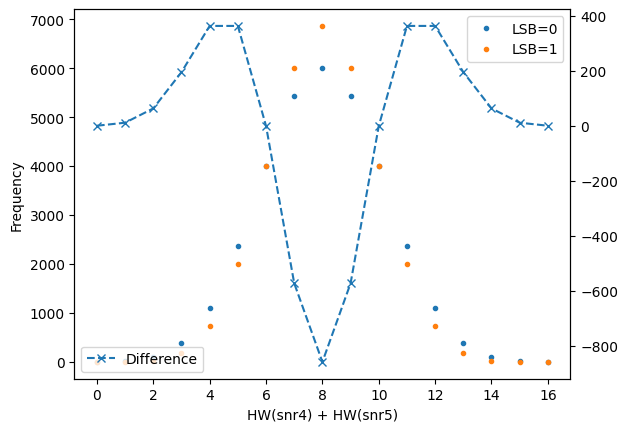

In [4]:
import matplotlib.pyplot as plt
x = []
y0 = []
y1 = []
for k in c2.keys():
    x.append(int(k))
    y0.append(c2[k][0])
    y1.append(c2[k][1])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y0, '.', label='LSB=0')
ax.plot(x, y1, '.', label='LSB=1')
ax.set_ylabel('Frequency')
ax.set_xlabel('HW(snr4) + HW(snr5)')
ax2 = ax.twinx()
ax2.plot(x, np.array(y0)-np.array(y1), 'x--', label='Difference')
ax.legend()
ax2.legend()